In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\vatch\Downloads\archive (19)\housing.csv")
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [6]:
print(X)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.32783522  1.05254828  0.98214266 ... -0.01556621  2.83074203
  -0.38446649]
 [-1.32284391  1.04318455 -0.60701891 ... -0.01556621  2.83074203
  -0.38446649]
 [-1.33282653  1.03850269  1.85618152 ... -0.01556621  2.83074203
  -0.38446649]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.87362627  1.77823747 -0.84539315 ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.83369581  1.75014627 -1.00430931 ... -0.01556621 -0.35326426
  -0.38446649]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[ 1.26764451 -1.36797628  0.34647803 ... -0.01556621 -0.35326426
   2.60100692]
 [ 0.7036268  -0.87169852  1.61780729 ... -0.01556621 -0.35326426
   2.60100692]
 [-0.45435647 -0.45501247 -1.95780625 ... -0.01556621 -0.35326426
   2.60100692]
 ...
 [ 0.59381804 -0.74997001  0.58485227 ... -0.01556621 -0.35326426
  -0.38446649]
 [-1.19306993  0.91209231 -1.08376738 ... -0.01556621 -0.35326426
  -0.38446649]
 [-1.42267006  1.00104776  1.85618152 ... -0.01556621  2.83074203
  -0.38446649]] [[ 0.27936569  0.20044873 -0.2891866  ... -0.01556621 -0.35326426
  -0.38446649]
 [ 0.05475686 -0.23028292  0.10810379 ... -0.01556621 -0.35326426
  -0.38446649]
 [-1.43265267  1.01509336  1.85618152 ... -0.01556621  2.83074203
  -0.38446649]
 ...
 [-1.23799169  0.78568194 -0.2891866  ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.09498235  0.53286119  0.58485227 ... -0.01556621 -0.35326426
  -0.38446649]
 [ 0.59880935 -0.66101456 -0.92485123 ... -0.01556621 -0.35326426
  -0.38446649]] 14196    103000.

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [11]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 2404389528.63
Root Mean Squared Error: 49034.57


In [12]:
importances = model.feature_importances_
feature_names = df.drop("median_house_value", axis=1).columns
indices = np.argsort(importances)[-5:]

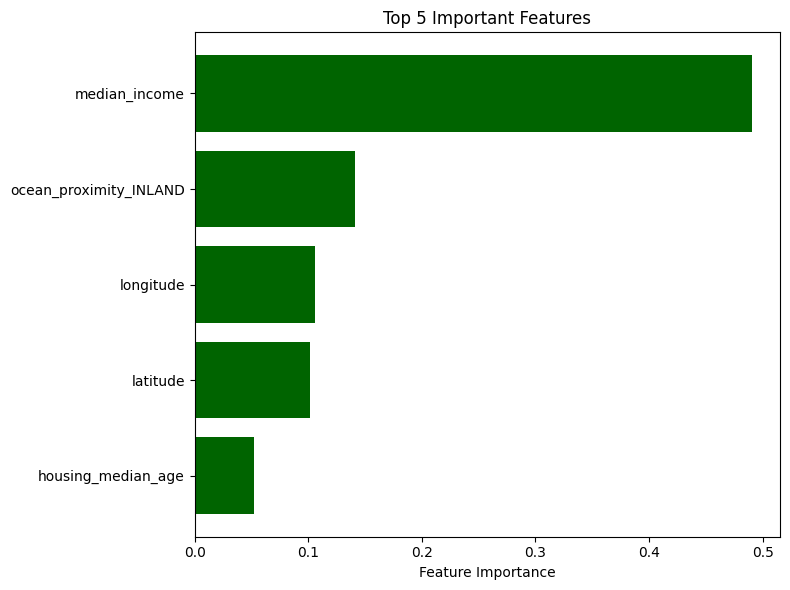

In [13]:
plt.figure(figsize=(8, 6))
plt.barh(feature_names[indices], importances[indices], color='darkgreen')
plt.xlabel("Feature Importance")
plt.title("Top 5 Important Features")
plt.tight_layout()
plt.show()

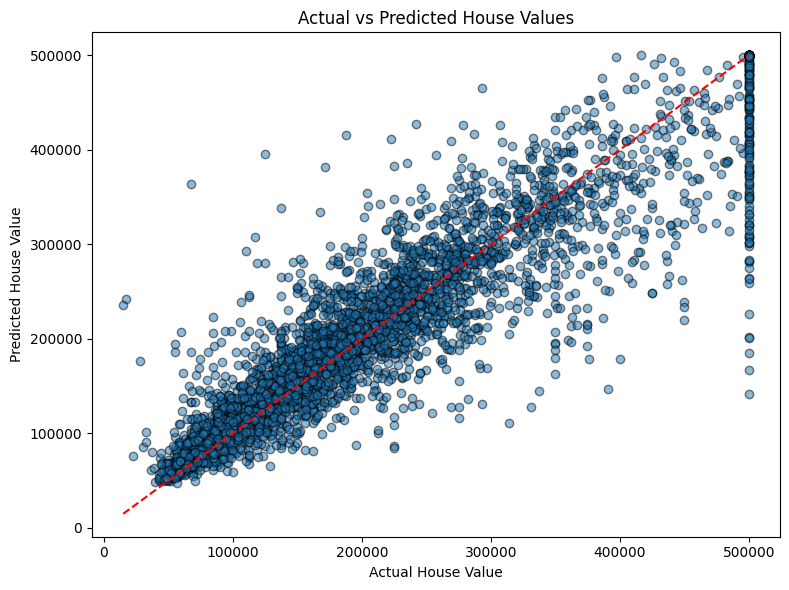

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.tight_layout()
plt.show()

In [15]:
print("\n🔍 Insight:")
print(f"Top features influencing house prices: {', '.join(feature_names[indices][::-1])}")



🔍 Insight:
Top features influencing house prices: median_income, ocean_proximity_INLAND, longitude, latitude, housing_median_age
